In [61]:
import matplotlib.pyplot as plt
import cv2
import numpy as np
import math

In [28]:
img = cv2.imread('../data/data_png_CROHME_training_2011/formulaire001-equation031.png')

In [35]:
ret,thresh = cv2.threshold(img,127,255,cv2.THRESH_BINARY_INV)

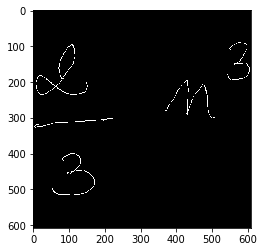

In [36]:
plt.imshow(thresh)

In [46]:
file = open('../data/segmented/data_png_CROHME_training_2011/formulaire001-equation031/coords.txt')

In [47]:
coords = []
for line in file:
    c = line.strip().split(',')
    c = [int(elem) for elem in c]
    coords.append(c)

4,300,220,28

7,94,146,143

52,400,121,117

369,194,139,108

542,90,62,106



In [50]:
coords = np.array(coords)

# Centroids of all the components

In [51]:
centroids = np.zeros((coords.shape[0],2))
centroids[:,0] = coords[:, 0] + (0.5* coords[:,2])
centroids[:,1] = coords[:,1] + (0.5* coords[:,3])

plot points completed


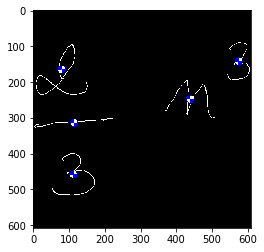

In [60]:
## plot point on image
## plot point on image
for i in range(len(centroids)):
    cx,cy = centroids[i][0], centroids[i][1]
    pid=i
    cv2.circle(thresh,(int(cx),int(cy)),10,(255,255,255),-11)
    cv2.circle(thresh,(int(cx),int(cy)),11,(0,0,255),1) # draw circle
    cv2.ellipse(thresh, (int(cx),int(cy)), (10,10), 0, 0, 90,(0,0,255),-1 )
    cv2.ellipse(thresh, (int(cx),int(cy)), (10,10), 0, 180, 270,(0,0,255),-1 )
    cv2.circle(thresh,(int(cx),int(cy)),1,(0,255,0),1) # draw center
print('plot points completed')
plt.imshow(thresh)

# Heuristics - Fractions

If angle is -ve, the curr is above prev

In [64]:
angles= []
for i in range(1, len(centroids)):
    prev = centroids[i-1]
    curr = centroids[i]
    angle = math.degrees(math.atan2(curr[1]-prev[1], curr[0]-prev[0]))
    angles.append(angle)
angles = np.array(angles) 

In [65]:
angles

array([-102.89595257,   83.67053981,  -32.850554  ,  -37.97805999])